# Análise de Dados do Dataset

Primeiras linhas do dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   


<ipython-input-6-998a2478c416>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='viridis')


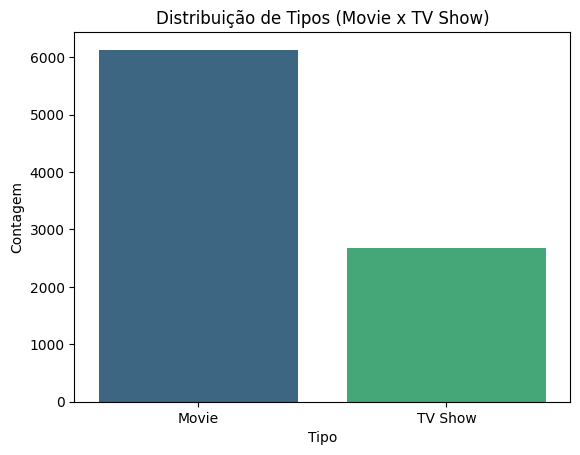

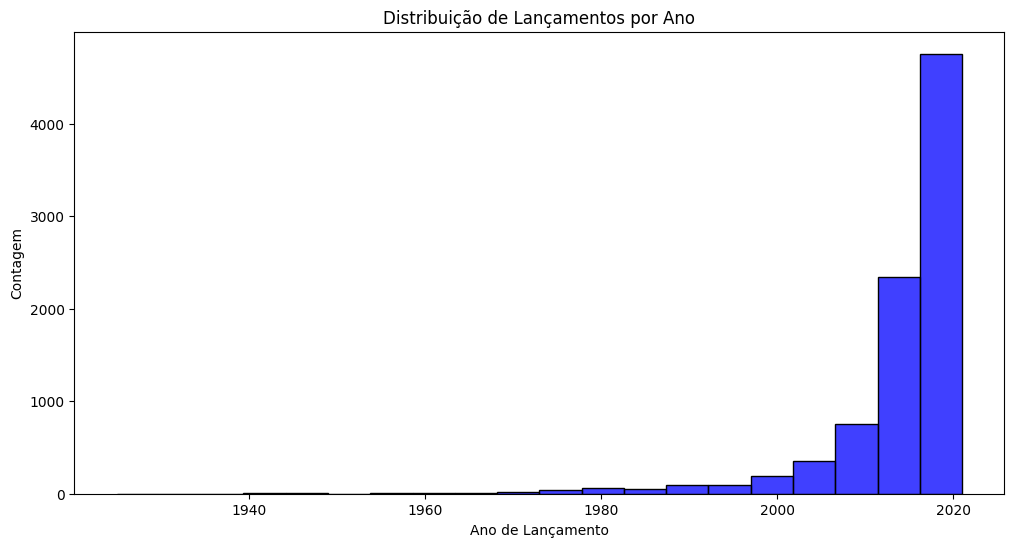

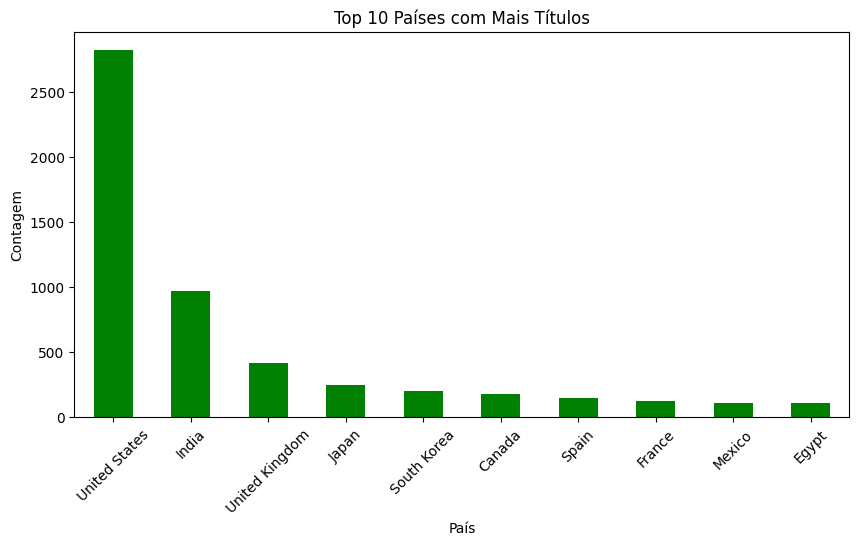

<ipython-input-6-998a2478c416>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index, palette='coolwarm')


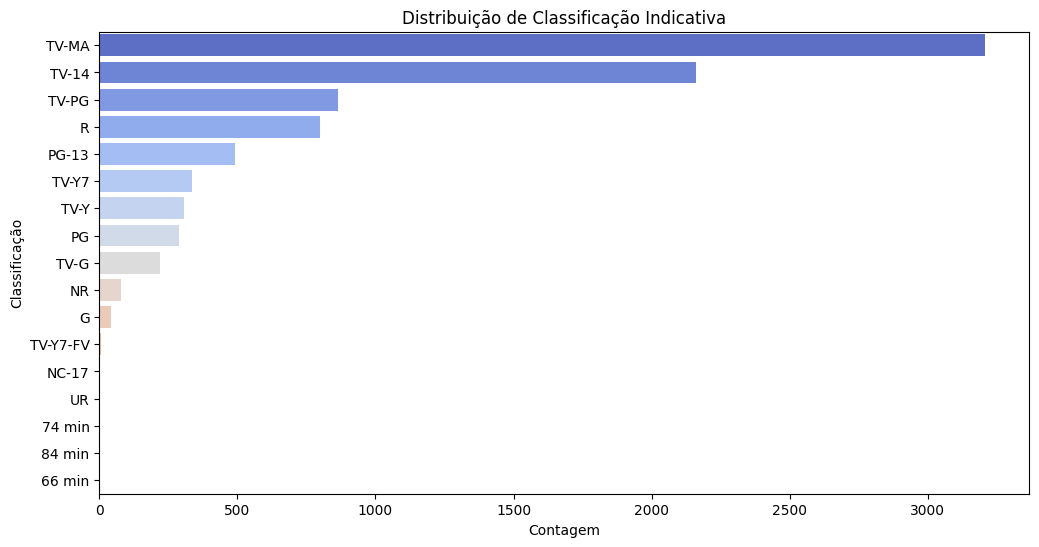

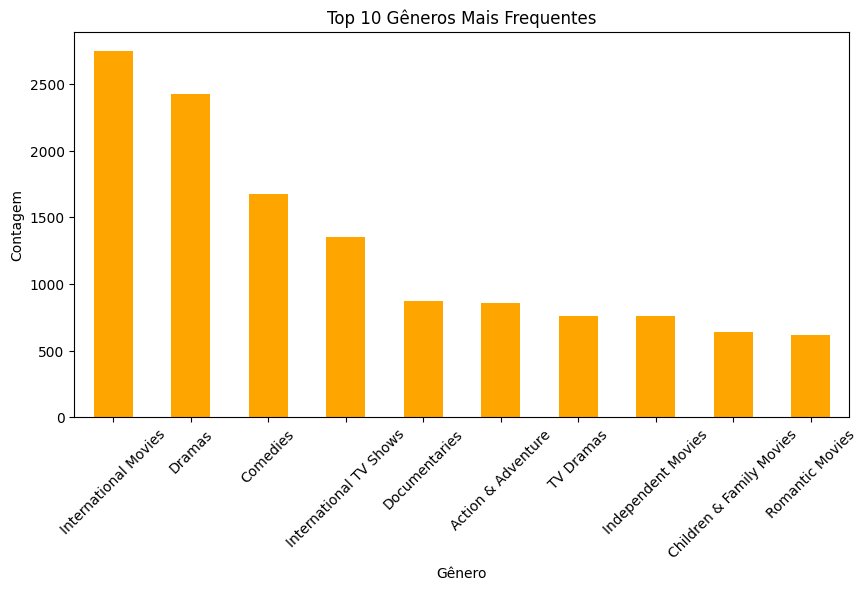

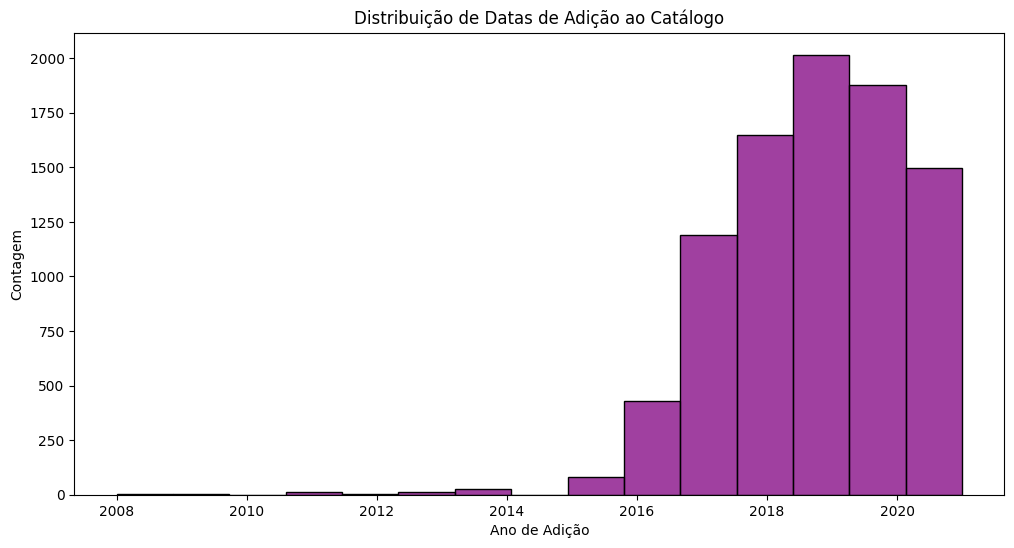

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'netflix_titles.csv'  # Substitua pelo caminho do arquivo
data = pd.read_csv(file_path)

# Inspeção geral dos dados
print("Primeiras linhas do dataset:")
print(data.head())

print("\nInformações gerais do dataset:")
print(data.info())

print("\nDescrição estatística do dataset:")
print(data.describe(include='all'))

# Contagem de valores nulos por coluna
print("\nValores nulos por coluna:")
print(data.isnull().sum())

# Distribuição de tipos (Movie x TV Show)
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Distribuição de Tipos (Movie x TV Show)')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()

#  Distribuição de lançamentos por ano
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=20, kde=False, color='blue')
plt.title('Distribuição de Lançamentos por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.show()

# Países com mais títulos
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 Países com Mais Títulos')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Distribuição por classificação indicativa (rating)
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribuição de Classificação Indicativa')
plt.xlabel('Contagem')
plt.ylabel('Classificação')
plt.show()

# Análise de gêneros mais frequentes
genres = data['listed_in'].str.split(', ').explode().value_counts().head(10)
genres.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

#  Data de adição ao catálogo (ano)
# Limpando espaços adicionais na coluna 'date_added'
data['date_added'] = data['date_added'].str.strip()

# Convertendo a coluna 'date_added' para datetime e extraindo o ano
data['year_added'] = pd.to_datetime(data['date_added'], errors='coerce').dt.year

# Visualização da distribuição de anos de adição ao catálogo
plt.figure(figsize=(12, 6))
sns.histplot(data['year_added'].dropna(), bins=15, kde=False, color='purple')
plt.title('Distribuição de Datas de Adição ao Catálogo')
plt.xlabel('Ano de Adição')
plt.ylabel('Contagem')
plt.show()


# Modelo não Supervisionado

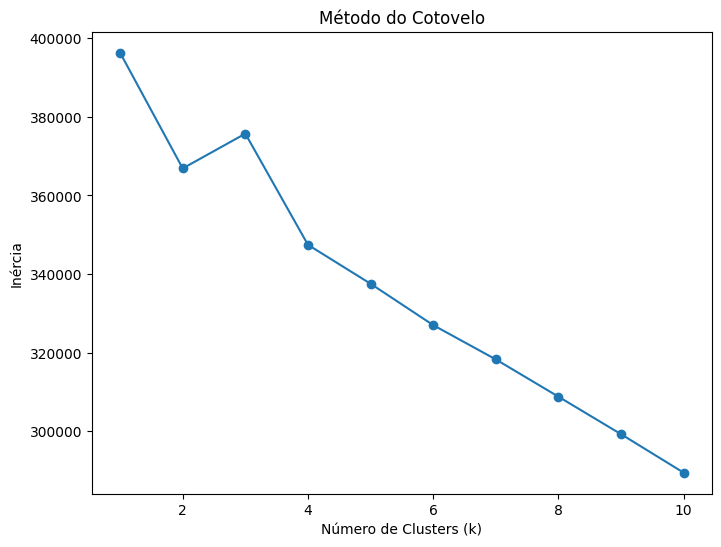

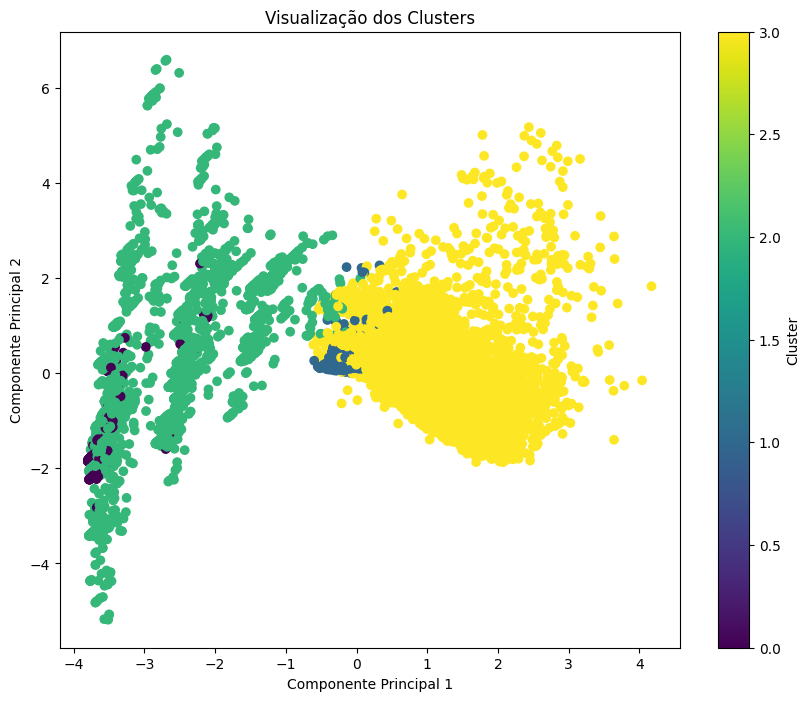

Modelo não supervisionado concluído. Dados salvos em 'netflix_clustered.csv'.


In [8]:

from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans
import numpy as np

# Pré-processamento
# Seleção de colunas relevantes
data['duration_numeric'] = data['duration'].str.extract('(\d+)').astype(float)  # Extrair números da duração
selected_columns = ['release_year', 'duration_numeric', 'rating', 'listed_in']

# Transformação de gêneros em variáveis binárias
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data['listed_in'].str.split(', '))
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Substituir valores categóricos por numéricos (exemplo: 'rating')
rating_mapping = {v: i for i, v in enumerate(data['rating'].unique())}
data['rating_numeric'] = data['rating'].map(rating_mapping)

# Dataframe final para clusterização
cluster_data = pd.concat([
    data[['release_year', 'duration_numeric', 'rating_numeric']],
    genres_df
], axis=1).fillna(0)

# Normalização
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determinação do número ideal de clusters (Método do Cotovelo)
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar o método do cotovelo
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

# Execução do modelo com o número ideal de clusters
optimal_k = 4  # Substitua pelo valor escolhido com base no gráfico
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Adicionar os clusters ao dataset original
data['Cluster'] = clusters

# Visualização dos clusters
# Reduzindo a dimensionalidade para visualização (opcional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cluster_data_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Visualização dos Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

# Salvar os dados clusterizados
data.to_csv('netflix_clustered.csv', index=False)
print("Modelo não supervisionado concluído. Dados salvos em 'netflix_clustered.csv'.")


In [13]:
from sklearn.cluster import KMeans

# Aplicação do KMeans com o número ideal de clusters
optimal_k = 4  # Ajuste conforme o método do cotovelo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Adicionar os clusters ao dataset original
data['Cluster'] = clusters

# Confirmação
print("Clusters adicionados ao dataset com sucesso!")


Clusters adicionados ao dataset com sucesso!


In [14]:
# Selecionar apenas colunas numéricas para a análise
numeric_columns = data.select_dtypes(include=['number']).columns

# Agrupar por cluster e calcular a média apenas das colunas numéricas
cluster_summary = data[numeric_columns].groupby(data['Cluster']).mean()

print("Média das características por cluster:")
print(cluster_summary)

# Visualizar gêneros mais frequentes por cluster (se aplicável)
for cluster_id in range(data['Cluster'].nunique()):
    print(f"\nCluster {cluster_id}:")
    cluster_genres = genres_df[data['Cluster'] == cluster_id].mean().sort_values(ascending=False)
    print(cluster_genres.head(5))  # Top 5 gêneros mais comuns no cluster


Média das características por cluster:
         release_year   year_added  duration_numeric  rating_numeric  Cluster
Cluster                                                                      
0         2017.477011  2019.225434          1.540230        1.718391      0.0
1         2015.603499  2017.991254         67.326531        1.600583      1.0
2         2016.596553  2018.881682          2.595686        2.945946      2.0
3         2012.919819  2018.909535        101.961304        3.137180      3.0

Cluster 0:
Spanish-Language TV Shows    1.000000
International TV Shows       0.890805
Crime TV Shows               0.385057
TV Dramas                    0.178161
Romantic TV Shows            0.149425
dtype: float64

Cluster 1:
Stand-Up Comedy          1.000000
Music & Musicals         0.020408
Documentaries            0.005831
TV Action & Adventure    0.000000
Romantic Movies          0.000000
dtype: float64

Cluster 2:
International TV Shows    0.468468
TV Dramas                 0.2867

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Silhouette Score
silhouette_avg = silhouette_score(cluster_data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(cluster_data_scaled, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Silhouette Score: 0.06863439881103521
Calinski-Harabasz Index: 412.6469776518454


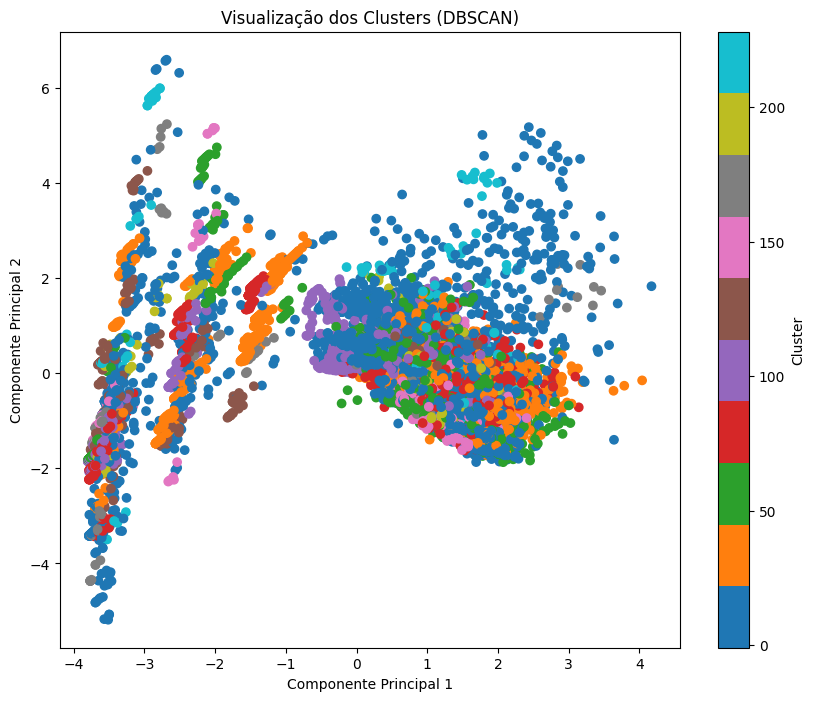

In [16]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Ajuste dos parâmetros conforme necessário
dbscan_clusters = dbscan.fit_predict(cluster_data_scaled)

# Adicionar clusters ao dataset
data['DBSCAN_Cluster'] = dbscan_clusters

# Visualizar clusters do DBSCAN
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_clusters, cmap='tab10')
plt.title('Visualização dos Clusters (DBSCAN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


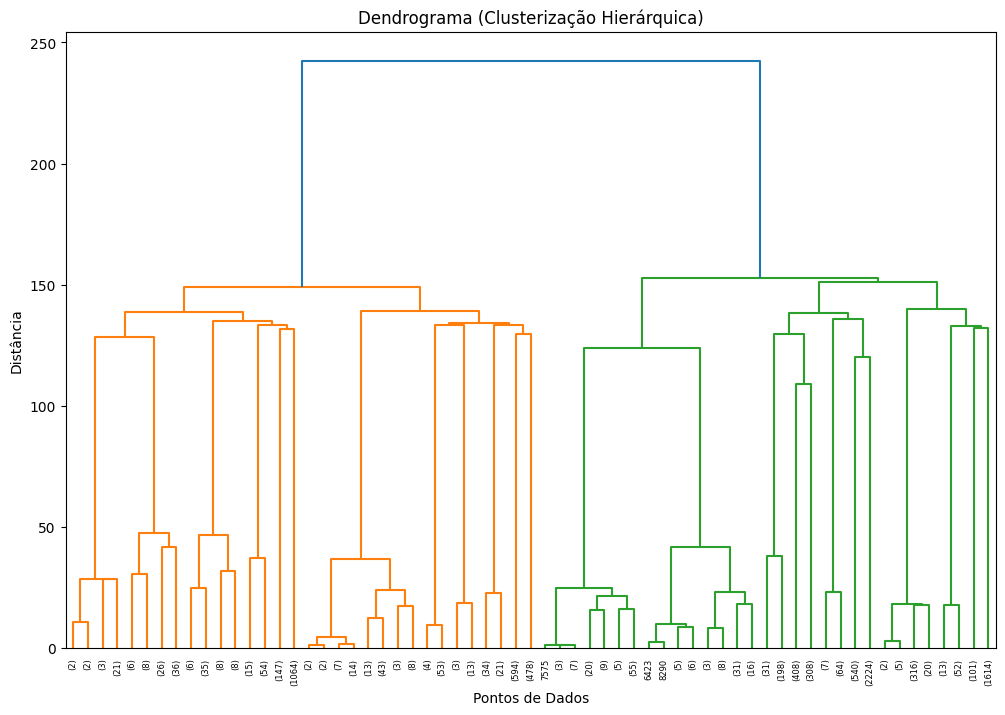

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Criar linkage para o dendrograma
linkage_matrix = linkage(cluster_data_scaled, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrograma (Clusterização Hierárquica)')
plt.xlabel('Pontos de Dados')
plt.ylabel('Distância')
plt.show()
